In [ ]:
import pandas as pd
import numpy as np
bnotes = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")

print(bnotes['quality'].unique())



[5 6 7 4 8 3]


In [ ]:
bnotes.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
X = bnotes.drop('quality', axis=1)
y = bnotes['quality']



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)



In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=50, activation='relu')
mlp.fit(X_train,y_train)
pred = mlp.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:

from sklearn.metrics import classification_report
print(classification_report(y_test,pred))



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        21
           5       0.71      0.50      0.58       193
           6       0.46      0.82      0.59       191
           7       0.25      0.01      0.03        70
           8       0.00      0.00      0.00         4

    accuracy                           0.53       480
   macro avg       0.24      0.22      0.20       480
weighted avg       0.50      0.53      0.47       480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


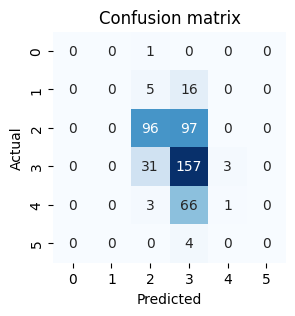

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()



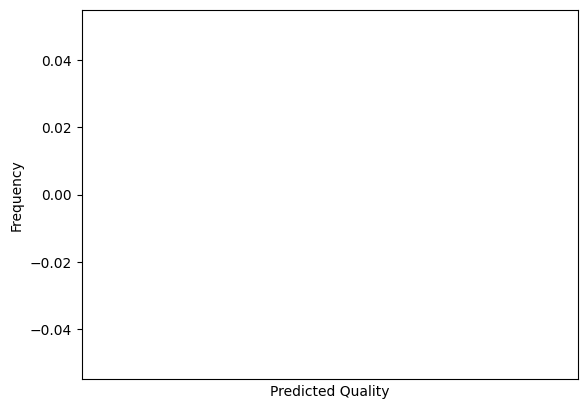

In [ ]:
# Plot histogram of predicted quality values for MLP classifier
pred = mlp.predict(X_test)
plt.hist(pred, bins=range(3, 3), align='left')
plt.xticks(range(3, 3))
plt.xlabel("Predicted Quality")
plt.ylabel("Frequency")
plt.show()